In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
permits = pd.read_csv('Building_Permits.csv')
#pd.read_csv('https://data.calgary.ca/api/views/c2es-76ed/rows.csv?accessType=DOWNLOAD')


In [4]:
permits = permits[permits['PermitClassMapped']=='Residential']

In [8]:
permits['PermitType'].unique()

array(['Commercial / Multi Family Project',
       'Residential Improvement Project', 'Single Construction Permit',
       'Demolition', 'Environmental Restoration Permit'], dtype=object)

In [10]:
permits=permits.set_index('AppliedDate')


In [16]:
permits.index =pd.to_datetime(permits.index)

<AxesSubplot:xlabel='AppliedDate'>

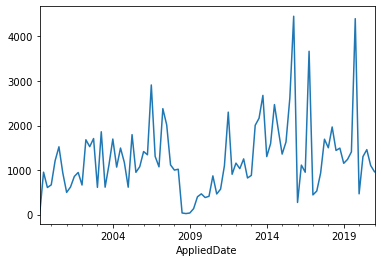

In [19]:
permits[permits['PermitType']=='Commercial / Multi Family Project'].resample('Q').sum()['HousingUnits'].plot()

<AxesSubplot:xlabel='AppliedDate'>

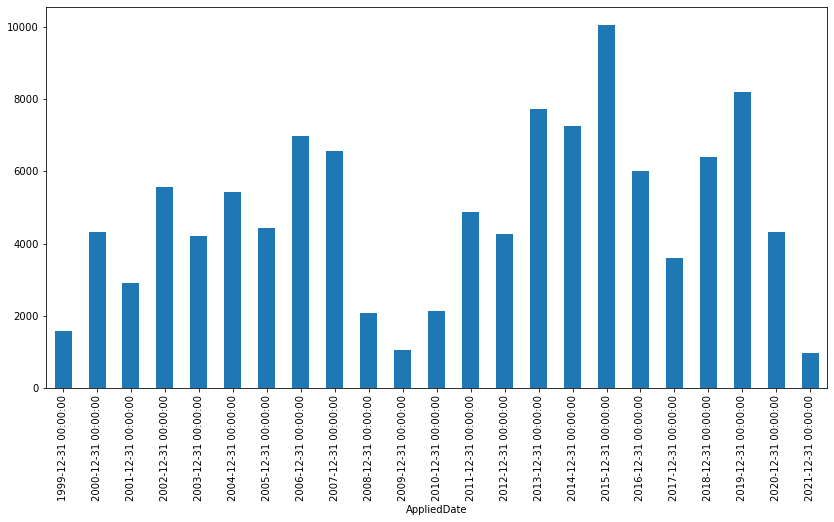

In [26]:
permits[permits['PermitType']=='Commercial / Multi Family Project'].resample('A').sum()['HousingUnits'].plot(figsize=(14,7),kind='bar')

<AxesSubplot:xlabel='AppliedDate'>

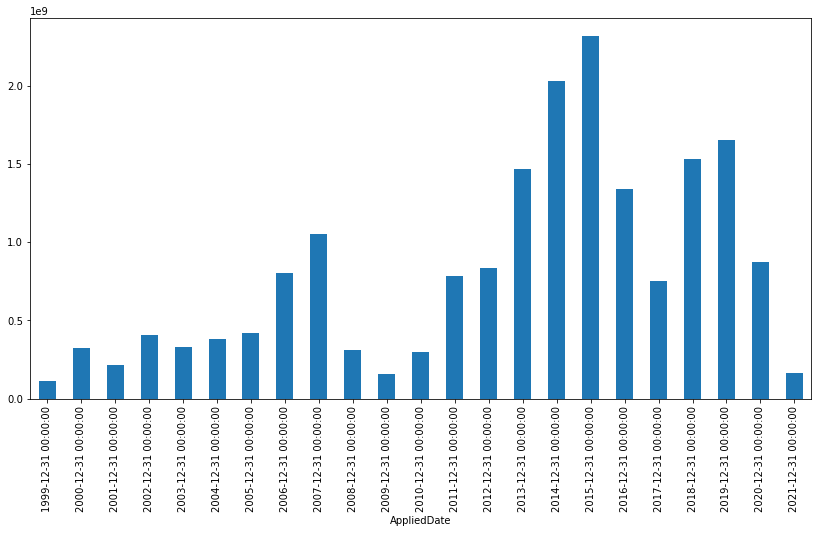

In [76]:
permits[permits['PermitType']=='Commercial / Multi Family Project'].resample('A').sum()['EstProjectCost'].plot(figsize=(14,7),kind='bar')

<AxesSubplot:xlabel='AppliedDate'>

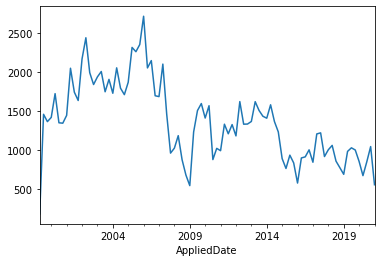

In [20]:
permits[permits['PermitType']=='Single Construction Permit'].resample('Q').sum()['HousingUnits'].plot()

<AxesSubplot:xlabel='AppliedDate'>

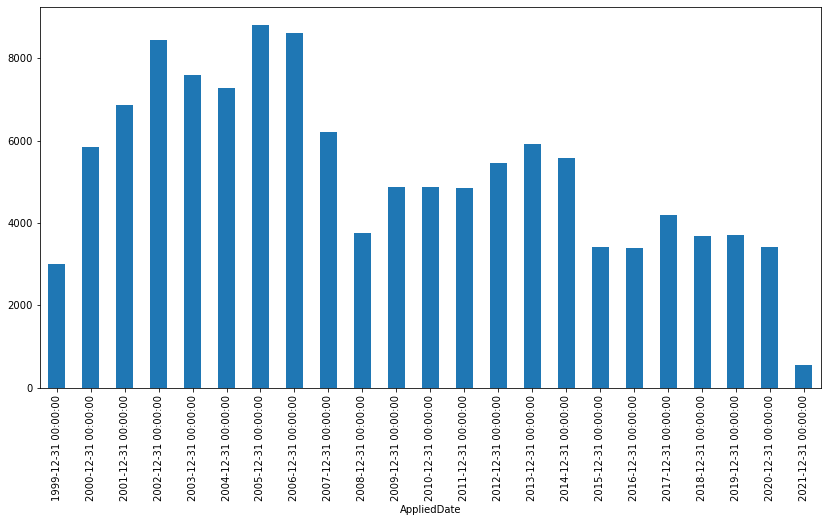

In [27]:
permits[permits['PermitType']=='Single Construction Permit'].resample('A').sum()['HousingUnits'].plot(figsize=(14,7),kind='bar')


In [28]:
permits[permits['PermitType']=='Single Construction Permit'].resample('A').sum()

,HousingUnits,EstProjectCost,TotalSqFt,Latitude,Longitude,LocationCount
AppliedDate,,,,,,
1999-12-31,3002,3.779393e+08,5388832.12,157613.330665,-3.522181e+05,3104.0
2000-12-31,5834,7.386500e+08,10594706.13,305128.043925,-6.818679e+05,6024.0
2001-12-31,6870,8.834126e+08,12327900.84,357724.077367,-7.994104e+05,7053.0
2002-12-31,8440,1.139930e+09,15538922.93,441230.595624,-9.860968e+05,8756.0
2003-12-31,7598,1.075454e+09,14431530.45,397793.096465,-8.890607e+05,7923.0
2004-12-31,7285,1.103769e+09,14071084.91,381550.327790,-8.529606e+05,7547.0
2005-12-31,8799,1.408747e+09,17581926.70,460800.445046,-1.030208e+06,9229.0
2006-12-31,8612,1.449129e+09,17516397.85,443243.159603,-9.909790e+05,8757.0
2007-12-31,6208,1.313945e+09,12357389.88,321002.975637,-7.177863e+05,6581.0


In [34]:
sfd_m = permits[permits['PermitType']=='Single Construction Permit'].resample('m').sum()

In [38]:
sfd_m.loc[sfd_m.index.month==1]

,HousingUnits,EstProjectCost,TotalSqFt,Latitude,Longitude,LocationCount
AppliedDate,,,,,,
2000-01-31,413,50867547.0,732733.50,21496.423608,-48034.904370,421.0
2001-01-31,423,54412205.0,756417.00,22056.759619,-49295.020877,434.0
2002-01-31,615,77928976.0,1064928.00,31959.040458,-71423.578498,630.0
2003-01-31,669,91373784.0,1207407.63,34672.677776,-77469.013790,681.0
2004-01-31,461,67620432.0,855108.50,23786.656278,-53177.688811,466.0
2005-01-31,508,82015902.0,1003976.40,26441.090158,-59114.728766,519.0
2006-01-31,814,131712675.0,1592156.45,41895.995756,-93660.417654,825.0
2007-01-31,440,100221141.0,937529.00,22797.547110,-50986.110062,461.0
2008-01-31,317,69574576.0,639097.59,16223.980378,-36270.582851,341.0


In [24]:
permits[permits['PermitType']=='Commercial / Multi Family Project']

,PermitNum,StatusCurrent,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,...,CommunityCode,CommunityName,Latitude,Longitude,Location,LocationCount,LocationTypes,LocationAddresses,LocationsWKT,LocationsGeoJSON
AppliedDate,,,,,,,,,,,,,,,,,,,,,
2018-07-06,BP2018-08876,Completed,2018/07/12,2019/11/05,Commercial / Multi Family Project,Building,1606 - Ths Townhouse,Townhouse,Residential,New,...,KIL,KILLARNEY/GLENGARRY,51.034818,-114.128922,"(51.0348180849046, -114.128921614676)",5.0,Titled Parcel;Building;Building;Building;Building,2968 21 AV SW;2984 21 AV SW;2980 21 AV SW;2976...,MULTIPOINT (-114.128921614676 51.0348180849046...,"{""type"":""MultiPoint"",""coordinates"":[[-114.1289..."
2019-08-16,BP2019-11129,Completed,2019/08/30,2020/10/16,Commercial / Multi Family Project,Building,1606 - Ths Townhouse,Townhouse,Residential,New,...,CNS,CORNERSTONE,51.151422,-113.935688,"(51.1514224315255, -113.93568834933828)",9.0,Titled Parcel;Building;Building;Building;Build...,39 CORNER MEADOWS PA NE;#208 39 CORNER MEADOWS...,MULTIPOINT (-113.93568834933828 51.15142243152...,"{""type"":""MultiPoint"",""coordinates"":[[-113.9356..."
2018-08-16,BP2018-10909,Completed,2018/09/11,2020/01/17,Commercial / Multi Family Project,Building,1606 - Ths Townhouse,Townhouse,Residential,New,...,CRA,CRANSTON,50.864812,-113.977399,"(50.864811962220855, -113.97739946216734)",6.0,Titled Parcel;Building;Building;Building;Build...,891 CRANSTON AV SE;897 CRANSTON AV SE;893 CRAN...,MULTIPOINT (-113.97739946216734 50.86481196222...,"{""type"":""MultiPoint"",""coordinates"":[[-113.9773..."
2019-08-16,BP2019-11135,Completed,2019/08/30,2020/09/15,Commercial / Multi Family Project,Building,1606 - Ths Townhouse,Townhouse,Residential,New,...,CNS,CORNERSTONE,51.151422,-113.935688,"(51.1514224315255, -113.93568834933828)",5.0,Titled Parcel;Building;Building;Building;Building,39 CORNER MEADOWS PA NE;#103 39 CORNER MEADOWS...,MULTIPOINT (-113.93568834933828 51.15142243152...,"{""type"":""MultiPoint"",""coordinates"":[[-113.9356..."
2016-10-28,BP2016-13346,Issued Permit,2019/03/27,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,...,NGM,NORTH GLENMORE PARK,51.005122,-114.109780,"(51.0051219327202, -114.109779571914)",1.0,Titled Parcel,2110 54 AV SW,POINT (-114.109779571914 51.0051219327202),"{""type"":""Point"",""coordinates"":[-114.1097795719..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-26,BP2021-01311,Issued Permit,2021/01/29,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,Fire/ Security Alarm,...,EDG,EDGEMONT,51.126253,-114.138345,"(51.12625253349144, -114.13834513427288)",2.0,Titled Parcel;Building,40 EDENWOLD DR NW;3400 EDENWOLD HT NW,MULTIPOINT (-114.13834513427288 51.12625253349...,"{""type"":""MultiPoint"",""coordinates"":[[-114.1383..."
2021-01-29,BP2021-01503,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1706 - Rhs Rowhouse,Unspecified,Residential,New,...,LIV,LIVINGSTON,51.188111,-114.074955,"(51.18811140357478, -114.07495497090251)",6.0,Titled Parcel;Building;Building;Building;Build...,71 LUCAS ST NW;281 LUCAS AV NW;273 LUCAS AV NW...,MULTIPOINT (-114.07495497090251 51.18811140357...,"{""type"":""MultiPoint"",""coordinates"":[[-114.0749..."
2021-01-29,BP2021-01531,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,...,UND,UNIVERSITY DISTRICT,51.078784,-114.150082,"(51.07878402584808, -114.15008194748988)",92.0,Titled Parcel;Building;Building Suite;Building...,4237 NORFORD AV NW;380 SMITH ST NW;#313 380 SM...,MULTIPOINT (-114.15008194748988 51.07878402584...,"{""type"":""MultiPoint"",""coordinates"":[[-114.1500..."


In [39]:
multi_m = permits[permits['PermitType']=='Commercial / Multi Family Project'].resample('m').sum()

In [40]:
multi_m

,HousingUnits,EstProjectCost,TotalSqFt,Latitude,Longitude,LocationCount
AppliedDate,,,,,,
1999-06-30,15,1887143.0,0.0,102.069592,-227.992656,2.0
1999-07-31,248,26284544.0,0.0,1173.543332,-2623.393643,27.0
1999-08-31,540,31481183.0,0.0,1071.995791,-2395.963071,53.0
1999-09-30,164,12682572.0,0.0,612.810230,-1369.314440,28.0
1999-10-31,269,14300248.0,0.0,612.417783,-1368.994870,15.0
...,...,...,...,...,...,...
2020-10-31,236,45808519.0,0.0,2858.464775,-6388.366695,380.0
2020-11-30,444,83570867.0,0.0,2449.867649,-5474.688145,899.0
2020-12-31,423,101828377.0,0.0,2193.641217,-4905.066322,462.0


In [43]:
multi_m.loc[multi_m.index.month==1]

,HousingUnits,EstProjectCost,TotalSqFt,Latitude,Longitude,LocationCount
AppliedDate,,,,,,
2000-01-31,298,22574885.0,0.0,765.717657,-1711.339283,113.0
2001-01-31,149,8406700.0,0.0,612.453658,-1369.298359,20.0
2002-01-31,172,9690025.0,0.0,918.754411,-2053.280504,63.0
2003-01-31,148,11933004.0,0.0,2554.312298,-5708.479585,202.0
2004-01-31,265,12949000.0,0.0,714.592530,-1597.319367,96.0
2005-01-31,41,4290325.0,0.0,766.017835,-1711.397642,76.0
2006-01-31,86,8243742.0,0.0,1327.167709,-2966.064847,76.0
2007-01-31,152,24139220.0,0.0,1377.913747,-3079.108331,186.0
2008-01-31,306,40205381.0,0.0,1071.044942,-2394.958811,104.0


In [49]:
ratio = multi_m.loc[multi_m.index.month==1]['HousingUnits'].values/permits[permits['PermitType']=='Commercial / Multi Family Project'].resample('A').sum()['HousingUnits']['2000':].values

In [54]:
ratio[:-1].mean()

0.03469701141942169

In [55]:
permits[permits['PermitType']=='Commercial / Multi Family Project'].resample('A').sum()['HousingUnits']['2000':]

AppliedDate
2000-12-31     4332
2001-12-31     2917
2002-12-31     5576
2003-12-31     4202
2004-12-31     5425
2005-12-31     4434
2006-12-31     6976
2007-12-31     6580
2008-12-31     2076
2009-12-31     1034
2010-12-31     2126
2011-12-31     4873
2012-12-31     4258
2013-12-31     7724
2014-12-31     7267
2015-12-31    10056
2016-12-31     6001
2017-12-31     3595
2018-12-31     6399
2019-12-31     8198
2020-12-31     4329
2021-12-31      961
Freq: A-DEC, Name: HousingUnits, dtype: int64

In [58]:
permits[(permits['PermitType']=='Commercial / Multi Family Project')&(permits['WorkClassGroup']=='New')].resample('m').sum()

,HousingUnits,EstProjectCost,TotalSqFt,Latitude,Longitude,LocationCount
AppliedDate,,,,,,
1999-06-30,15,1871143.0,0.0,51.098897,-113.932476,1.0
1999-07-31,248,23831338.0,0.0,561.255353,-1254.596440,15.0
1999-08-31,540,31266984.0,0.0,816.746363,-1825.475232,48.0
1999-09-30,164,12387572.0,0.0,561.769762,-1255.221957,27.0
1999-10-31,268,13740198.0,0.0,255.071164,-570.259650,6.0
...,...,...,...,...,...,...
2020-10-31,236,41935794.0,0.0,1582.416671,-3536.020764,225.0
2020-11-30,443,80498254.0,0.0,1326.781952,-2964.903804,443.0
2020-12-31,423,100410910.0,0.0,1019.957892,-2281.456789,189.0


In [63]:
new_comm = permits[(permits['PermitType']=='Commercial / Multi Family Project')&(permits['WorkClassGroup']=='New')]

In [73]:
new_comm[new_comm.index.year==2021][['PermitNum', 'StatusCurrent', 'IssuedDate', 'CompletedDate',
       'PermitType', 'PermitTypeMapped', 'PermitClass', 'PermitClassGroup',
       'PermitClassMapped', 'WorkClass',
       'Description', 'ContractorName', 'HousingUnits', 'EstProjectCost',
       'TotalSqFt']]

,PermitNum,StatusCurrent,IssuedDate,CompletedDate,PermitType,PermitTypeMapped,PermitClass,PermitClassGroup,PermitClassMapped,WorkClass,Description,ContractorName,HousingUnits,EstProjectCost,TotalSqFt
AppliedDate,,,,,,,,,,,,,,,
2021-02-01,BP2021-01645,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1706 - Rhs Rowhouse,Unspecified,Residential,New,NaN,BAYWEST HOMES,4,711674.0,NaN
2021-02-04,BP2021-01802,Pending Plans Review Assignment,NaN,NaN,Commercial / Multi Family Project,Building,1706 - Rhs Rowhouse,Unspecified,Residential,New,NaN,STREETSIDE DEVELOPMENT,7,1557809.0,NaN
2021-02-04,BP2021-01826,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,Cedarglen Harvest Hills 3,CEDARGLEN LIVING,120,21056485.0,NaN
2021-02-04,BP2021-01827,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,New building - Cedarglen Carrington Apartments,CEDARGLEN LIVING,80,19056205.0,NaN
2021-02-02,BP2021-01670,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1706 - Rhs Rowhouse,Unspecified,Residential,New,NaN,BROOKFIELD RESIDENTIAL (ALBERTA),6,1076851.0,NaN
2021-02-09,BP2021-02013,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1506 - Apt Apartment,Apartment,Residential,New,NaN,NaN,169,38900000.0,NaN
2021-02-06,BP2021-01934,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1606 - Ths Townhouse,Townhouse,Residential,New,NaN,DAYTONA HOMES ( CALGARY) LP,3,612459.0,NaN
2021-02-08,BP2021-01955,Pending Plans Review,NaN,NaN,Commercial / Multi Family Project,Building,1706 - Rhs Rowhouse,Unspecified,Residential,New,NaN,JAYMAN BUILT MULTI FAMILY,8,1754036.0,NaN
2021-02-08,BP2021-01987,Hold,NaN,NaN,Commercial / Multi Family Project,Building,1606 - Ths Townhouse,Townhouse,Residential,New,Part 9 Townhomes,TRUMAN HOMES,4,1003052.0,NaN


In [72]:
new_comm.columns

Index(['PermitNum', 'StatusCurrent', 'IssuedDate', 'CompletedDate',
       'PermitType', 'PermitTypeMapped', 'PermitClass', 'PermitClassGroup',
       'PermitClassMapped', 'WorkClass', 'WorkClassGroup', 'WorkClassMapped',
       'Description', 'ContractorName', 'HousingUnits', 'EstProjectCost',
       'TotalSqFt', 'OriginalAddress', 'CommunityCode', 'CommunityName',
       'Latitude', 'Longitude', 'Location', 'LocationCount', 'LocationTypes',
       'LocationAddresses', 'LocationsWKT', 'LocationsGeoJSON'],
      dtype='object')